<a href="https://colab.research.google.com/github/Ashwin-Anil-Abraham/Machine-Learning--KNN-algorithm/blob/main/Machine_Learning_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
df=pd.read_csv("/content/diabetes.csv")
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [13]:
x=df.iloc[:,0:8]
#print(x)

y=df.iloc[:,-1]
print(y)

#x=df.iloc[:,0:8].values      #"values" is used to change the value to array and it helps to make faster
#x
#y=df.iloc[:,-1].values
y.shape


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


(768,)

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)       #test size is used for to give 20% of data is used for tesing


#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)  #random_state=data sample each time pick cyumbo constant ayit nilkan

x_train.head()           #evide random state illatond each time run kodukumbo different values aayirikum o/p verune

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84,0,0,0,0.0,0.304,21
618,9,112,82,24,0,28.2,1.282,50
346,1,139,46,19,83,28.7,0.654,22
294,0,161,50,0,0,21.9,0.254,65
231,6,134,80,37,370,46.2,0.238,46


In [15]:
x_train.shape        # here the o/p the 80% ie we have 768 and its 80% is 614
y_train.shape
x_test.shape        #here we have the 20%
y_test.shape

(154,)

In [16]:
from sklearn.preprocessing import MinMaxScaler

mm=MinMaxScaler()
mm.fit(x_train)                      #"fit" is used to find unknown value ie min and the max value
x_train=mm.transform(x_train)       # "transfrom"is used to apply the min-max function
#x_train


#now we need to transfrom the x_test

x_test=mm.transform(x_test)
print(x_test)


[[0.35294118 0.49246231 0.47540984 ... 0.50670641 0.15029889 0.36666667]
 [0.11764706 0.56281407 0.6147541  ... 0.53204173 0.02988898 0.        ]
 [0.11764706 0.54271357 0.52459016 ... 0.45901639 0.03415884 0.        ]
 ...
 [0.47058824 0.47738693 0.59016393 ... 0.54843517 0.17378309 0.6       ]
 [0.11764706 0.73366834 0.57377049 ... 0.41728763 0.11058924 0.13333333]
 [0.47058824 0.3718593  0.57377049 ... 0.52608048 0.2677199  0.3       ]]


In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)    #it is traning or learning stage

#now predit

y_predict=knn.predict(x_test)
y_predict           #here it has the predicted values

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [18]:
#by adding new values
new=knn.predict(mm.transform([[9,112,82,24,0,28.2,1.282,50]]))
print(new)

[1]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [19]:
from sklearn.metrics import accuracy_score           #to find the accuracy
print(accuracy_score(y_test,y_predict))           #eqn for accuracy score is  := true prediction / total prediction
                                              # in this case it is 76+29/76+29+23+26


0.6818181818181818


In [20]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[76 23]
 [26 29]]


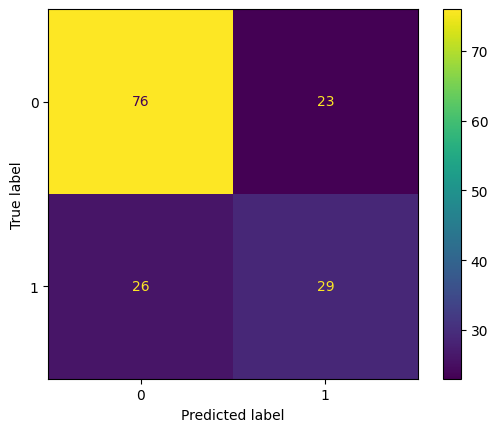

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76        99
           1       0.56      0.53      0.54        55

    accuracy                           0.68       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.68      0.68       154



2nd Project

In [23]:
import pandas as pd
l=pd.read_csv("/content/lung_cancer_examples.csv")
print(l.head())

     Name      Surname  Age  Smokes  AreaQ  Alkhol  Result
0    John         Wick   35       3      5       4       1
1    John  Constantine   27      20      2       5       1
2  Camela     Anderson   30       0      5       2       0
3    Alex       Telles   28       0      8       1       0
4   Diego     Maradona   68       4      5       6       1


In [24]:
x=l.iloc[:,2:6]
print(x.head())
y=l.iloc[:,-1]
print(y.head())

   Age  Smokes  AreaQ  Alkhol
0   35       3      5       4
1   27      20      2       5
2   30       0      5       2
3   28       0      8       1
4   68       4      5       6
0    1
1    1
2    0
3    0
4    1
Name: Result, dtype: int64


In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

x_train.head()
#x_train.shape
#y_train.shape
#x_test.shape
#y_test.shape

,Age,Smokes,AreaQ,Alkhol
36,59,20,3,4
31,56,20,3,3
8,45,2,6,0
17,19,12,8,0
6,58,15,10,0


In [26]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
mm.fit(x_train)
x_train=mm.transform(x_train)
#x_train

x_test=mm.transform(x_test)
x_test


array([[0.28813559, 0.08823529, 0.44444444, 0.5       ],
       [0.27118644, 0.        , 1.        , 0.        ],
       [0.13559322, 0.29411765, 0.66666667, 0.25      ],
       [0.16949153, 0.58823529, 0.11111111, 1.        ],
       [0.05084746, 0.58823529, 0.77777778, 0.375     ],
       [0.28813559, 0.58823529, 0.44444444, 0.125     ],
       [0.42372881, 0.88235294, 0.22222222, 1.        ],
       [0.05084746, 0.58823529, 0.44444444, 0.375     ],
       [0.16949153, 0.29411765, 0.33333333, 0.125     ],
       [0.11864407, 0.05882353, 0.44444444, 0.125     ],
       [0.74576271, 0.58823529, 0.44444444, 0.75      ],
       [0.16949153, 0.        , 0.77777778, 0.125     ]])

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

y_predict=knn.predict(x_test)
y_predict

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [28]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9166666666666666


In [29]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_predict))

[[8 0]
 [1 3]]


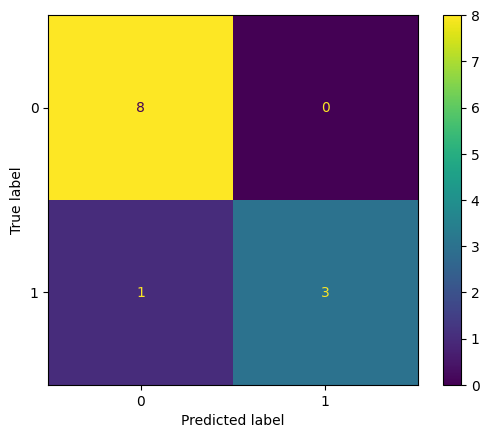

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predict))

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.75      0.86         4

    accuracy                           0.92        12
   macro avg       0.94      0.88      0.90        12
weighted avg       0.93      0.92      0.91        12

